## Exploratory Data Analysis on Wine Quality Dataset

In this notebook, I analyze the Wine Quality dataset (red and white wines) from the UCI Machine Learning Repository.
* Dataset source: https://archive.ics.uci.edu/dataset/186/wine+quality

The goal is to explore the key features, understand their distributions, and investigate relationships that might explain wine quality ratings.

#### Objectives
- Perform basic data checks and cleaning.
- Understand the distribution of key features.
- Look for and handel missing values.
- Detect outliers and unusual patterns.
- Analyze correlations between chemical properties and wine quality.


In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
red_wine = pd.read_csv("../data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("../data/winequality-white.csv", sep=";")

# Add type columns to distinguish 
red_wine['type']='red'
white_wine['type']='white'

# Merge both dataframes
wine = pd.concat([red_wine,white_wine], axis=0)

# Reset old index to avoid confusion
wine = wine.reset_index(drop=True)


#### Dataset Dimensions

The dataset consists of **6,497 rows** and **13 columns**.  
- Each row represents a wine sample.  
- Each column represents a chemical property (such as acidity, sugar, alcohol) or the quality score.  


In [15]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Column Info

- **fixed acidity** :total concentration of non-volatile acids.
- **volatile acidity** :amount of acetic acid present.
- **citric acid** :amount of citric acid present.
- **residual sugar** :amount of sugar.
- **chlorides** :salt content in the wine.
- **free sulfur dioxide** :portion of sulphur dioxide that protects wine from microbes and oxidation.
- **total sulfur dioxide** :sum of free and bound sulphur dioxide levels.
- **density** :density of the wine solution.
- **pH** :acidity measure(lower pH = higher acidity).
- **sulphates** : preservatives.
- **alcohol** :amount of alcohol present by volume.
- **quality** :rating between 0 (poor) and 10 (excellent) given by wine experts.

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##### Observation
All features have **6,497 observations** which implies NO MISSNG VALUES FOUND .  


#### Descriptive Statistics

For better understanding of data, I have calculated the descriptive statistics of each numerical value. It provides the average values, variations and potential outliers.

In [17]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
# To check quality rating for maximum wine counts
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

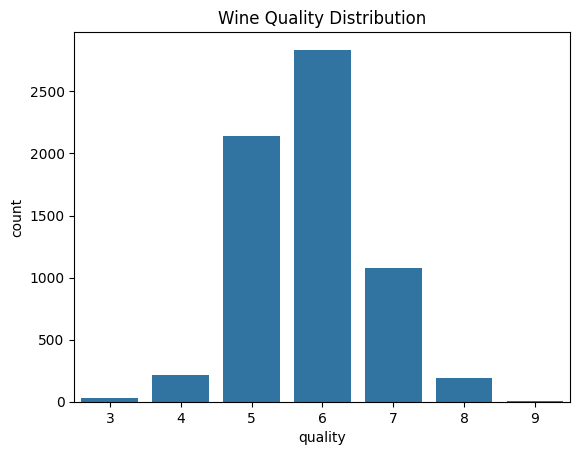

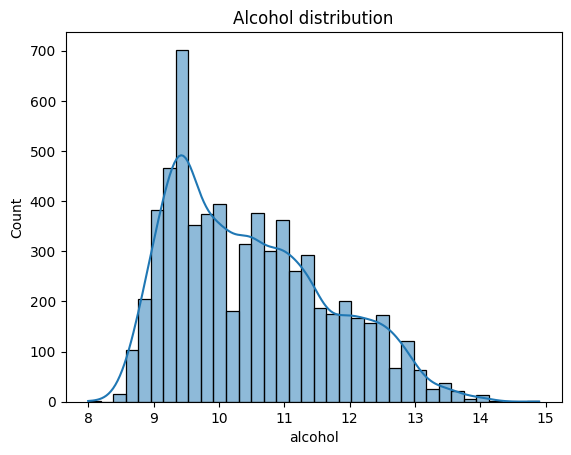

In [24]:
# Distribution of wine quality

sns.countplot(x='quality', data=wine)
plt.title("Wine Quality Distribution")
plt.savefig("../Outputs/quality_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Distribution of alcohol

sns.histplot(wine['alcohol'], kde = True)
plt.title("Alcohol distribution")
plt.show()

##### Observations
- Most wines are rated between **5 and 6**, indicating the dataset is slightly imbalanced.  
- Very few wines are rated below 4 or above 7, which may limit predictive modeling for extreme quality scores.  


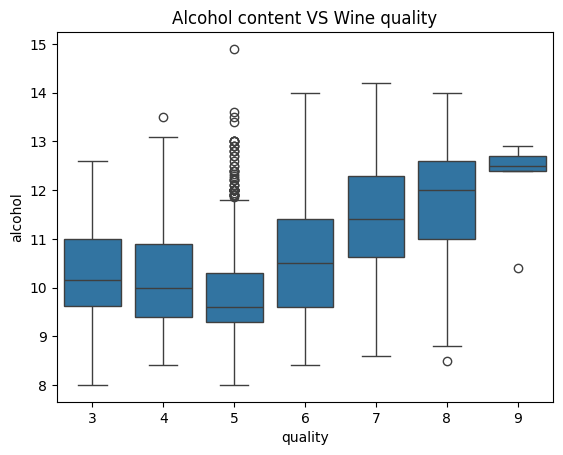

In [26]:
# Alcohol VS Quality
sns.boxplot(x='quality',y='alcohol',data=wine)
plt.title("Alcohol content VS Wine quality")
plt.savefig("../Outputs/alcohol_vs_quality.png", dpi=300, bbox_inches="tight")
plt.show()

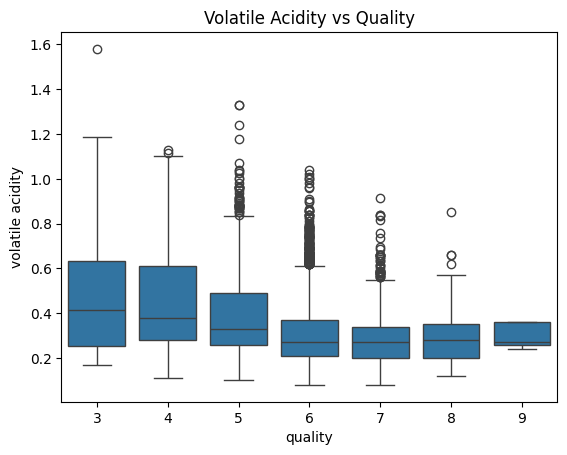

In [ ]:
# Volatile Acidity vs Quality

sns.boxplot(x="quality", y="volatile acidity", data=wine)
plt.title("Volatile Acidity vs Quality")
plt.savefig("../Outputs/volatile_acidity_vs_quality.png", dpi=300, bbox_inches="tight")
plt.show()


##### Conclusion 
Confirms that higher acidity reduces quality.

### Correlation Heatmap

I generate a correlation heatmap to check how numerical features are related to each other and to the target variable `quality`.  
Strong correlations can reveal important predictors of wine quality.

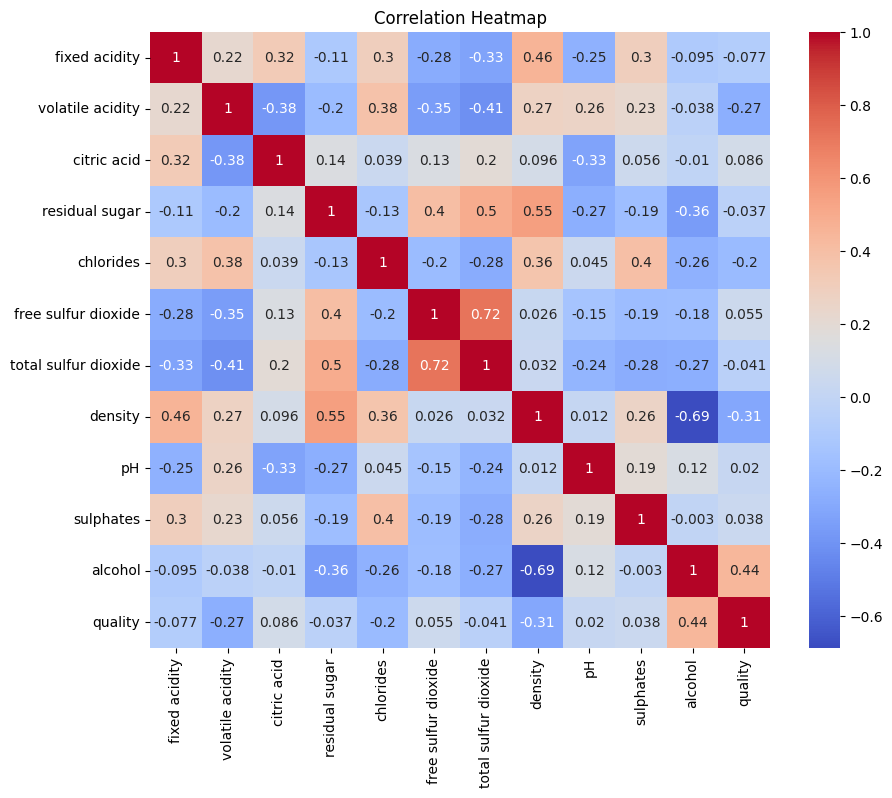

In [25]:
# Select only numeric columns
numeric_df = wine.select_dtypes(include=["number"])

# Compute correlation
corr = numeric_df.corr()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("../Outputs/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()




##### Observations
- `alcohol` shows a strong positive correlation with `quality`.  
- `volatile acidity` has a negative correlation with `quality`.  
- Most other features have weak to moderate correlations, suggesting that wine quality is influenced by multiple factors.  


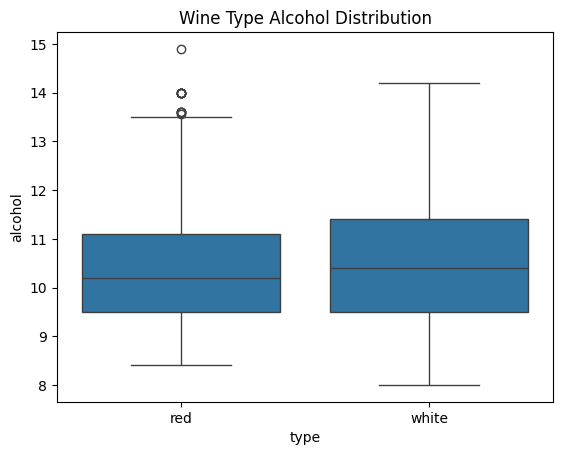

In [22]:
# Red and White Wine Comparision
sns.boxplot(x='type',y='alcohol',data=wine)
plt.title("Wine Type Alcohol Distribution")
plt.show()


##### Observation
White wines tend to have higher alcohol concentration than red wines.

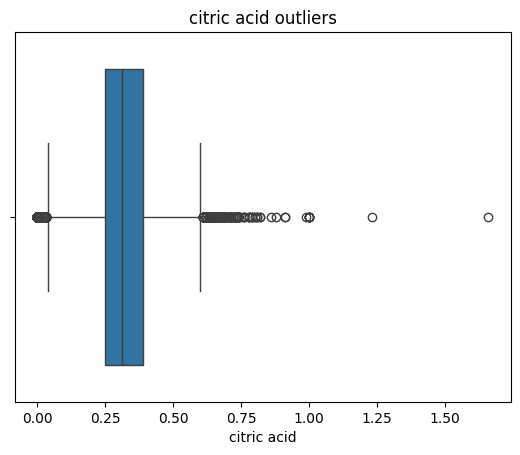

In [23]:
# Detecting Outliers using Boxplot (Citric acid)
sns.boxplot(x=wine['citric acid'])
plt.title("citric acid outliers")
plt.show()

##### Observations
- The majority of wines have citric acid below 0.5 g/L.  
- A few samples show unusually high values, which may be outliers worth investigating.  



## `Insights`

From this EDA, a few clear insights emerged:

- Most wines are rated between **5 and 6**, showing that the dataset is slightly imbalanced toward average quality.  
- **Alcohol** has a strong positive relationship with wine quality, meaning higher alcohol content often corresponds to higher ratings.  
- **Volatile acidity** shows a negative impact on quality, indicating that too much acidity lowers the score.  
- Features such as **residual sugar** and **citric acid** display skewed distributions with some outliers, which may affect modeling.  

Overall, this analysis provided a good understanding of the dataset and highlighted which features may be most useful for predicting wine quality.  
